In [1]:
#Prática - Lição 5
#Algoritmo de Grover

1. Primeiro passo

<img src="figures/grover_step1.jpg" width="1000" height="1000">

2. Segundo passo

<img src="figures/grover_step2.jpg" width="1000" height="1000">

3. Segundo passo

<img src="figures/grover_step3.jpg" width="1000" height="1000">

Circuito

<img src="figures/grover_circuit_high_level.png" width="1000" height="1000">

Referência: https://qiskit.org/textbook/ch-algorithms/grover.html

In [2]:
#Importando bibliotecas

from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

In [3]:
#Registro de qubits e bits

qr = QuantumRegister(2, 'q')
cr = ClassicalRegister(2, 'c')

### Determinação do Oráculo

Oráculo para o estado $\lvert \omega \rangle = \lvert 11 \rangle$ 


\begin{aligned}
U_\omega = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & -1 \\ \end{bmatrix}
\end{aligned}

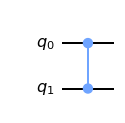

In [4]:
#Construção do oráculo

oraculo = QuantumCircuit(qr, name = 'Oraculo')
oraculo.cz(qr[0], qr[1])
oraculo.draw(output = 'mpl') #desenhando o oraculo

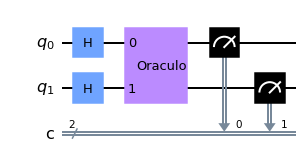

In [5]:
#Circuito do algoritmo de Grover e realizando a medição

grover = QuantumCircuit(qr, cr)
grover.h([qr[0], qr[1]])

grover.append(oraculo, [qr[0], qr[1]])
#grover.compose(oraculo, [qr[0], qr[1]])

grover.measure(qr,cr)
grover.draw(output = 'mpl')

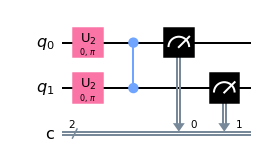

In [6]:
#Perceba que o oraculo corresponde a um gate cz

grover_decom = grover.decompose()
grover_decom.draw('mpl')

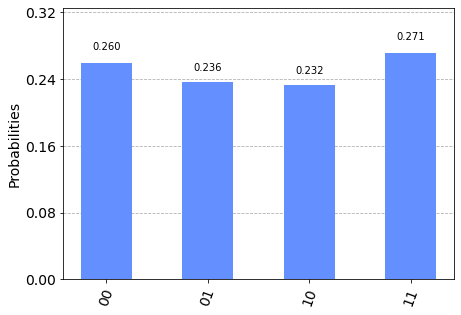

In [7]:
#Agora vamos analisar a distribuição de probabilidades

simulador = Aer.get_backend('qasm_simulator')
resultado = execute(grover, backend = simulador).result()
plot_histogram(resultado.get_counts(grover))

### Rotação 

Para completar o circuito, precisamos implementar a reflexão adicional $U_s = 2|s\rangle\langle s| - \mathbb{1}$. Ou seja, queremos acrescentar uma fase negativa a cada estado ortogonal a  $|s\rangle$, já que esta é uma reflexão sobre $|s\rangle$.

<img src="figures/grover_circuit_2qbuits_reflection.svg" width="300" height="300">



Protocolo:

1. Usamos a operação que transforma o estado $|s\rangle \rightarrow |0\rangle$, i.e.$H^{\otimes n}|s\rangle = |0\rangle$
    
2. Depois aplicamos um circuito que acrescenta uma fase ortogonal negativa aos estados ortogonais a $|0\rangle$:
    
    \begin{aligned}
        U_0 \frac{1}{2}\left( \lvert 00 \rangle + \lvert 01 \rangle + \lvert 10 \rangle + \lvert 11 \rangle \right) = \frac{1}{2}\left( \lvert 00 \rangle - \lvert 01 \rangle - \lvert 10 \rangle - \lvert 11 \rangle\right)
        \end{aligned}
        
      ou seja, os sinais de cada estado são invertidos, exceto para $\lvert 00 \rangle$. Podemos definir $U_0$ como
      
   <img src="figures/grover_circuit_2qbuits_reflection_0.svg" width="300" height="300">

3. Finalmente, fazemos a operação que transforma o estado $|0\rangle \rightarrow |s\rangle$:
    
    \begin{aligned}
    H^{\otimes n}U_0 H^{\otimes n} = U_s
\end{aligned}



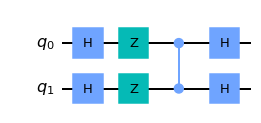

In [8]:
#Rotina de reflexão do algoritmo de Grover

reflexao = QuantumCircuit(qr, name = 'Reflexao')
reflexao.h([qr[0], qr[1]])
reflexao.z([qr[0], qr[1]])
reflexao.cz(qr[0], qr[1])
reflexao.h([qr[0], qr[1]])
reflexao.draw(output = 'mpl')

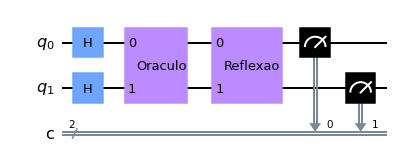

In [9]:
#Agora montando o circuito de busca do algoritmo de Grover

grover = QuantumCircuit(qr, cr)
grover.h([qr[0], qr[1]])
grover.append(oraculo, [qr[0], qr[1]])
grover.append(reflexao, [qr[0], qr[1]])
grover.measure(qr, cr)
grover.draw(output = 'mpl')

<img src="figures/grover_circuit_high_level.png" width="500" height="500">


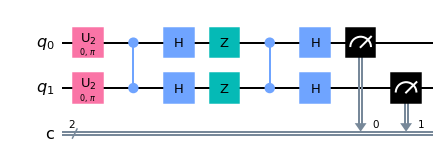

In [10]:
#Decompondo novamente

grover_decom = grover.decompose()
grover_decom.draw('mpl')

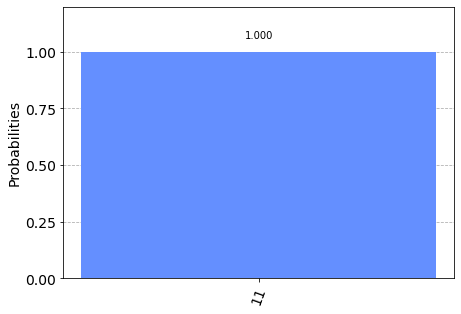

In [11]:
#Executando o circuito no simulador

simulador = Aer.get_backend('qasm_simulator')
resultado = execute(grover, backend = simulador).result()
plot_histogram(resultado.get_counts(grover))

In [12]:
#Agora vamos executar o circuito em um computador quântico real

import qiskit.tools.jupyter
from qiskit.tools import job_monitor

In [13]:
provider = IBMQ.load_account() #carregando a conta da IBMQ
%qiskit_backend_overview

In [14]:
#Rodando o circuito em si no computador quântico da IBM

backend = provider.get_backend('ibmq_lima')
job = execute(grover, backend = backend)
job_monitor(job)

Job Status: job has successfully run


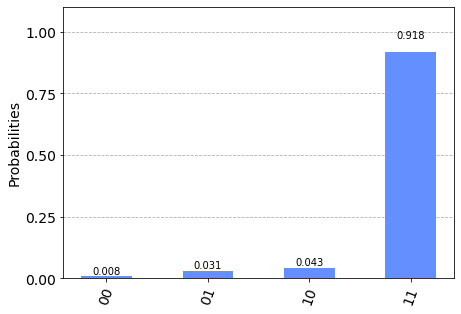

In [15]:
#analisando os resultados obtidos via computador quântico real

resultado = job.result()
plot_histogram(resultado.get_counts(grover))